In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
import nltk
import re

In [3]:
data=pd.read_csv("spam.csv",encoding='latin-1')

In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data=data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [9]:
data.columns=(["type","message"])

In [10]:
data.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Text(0.5,1,'Bar Chart')

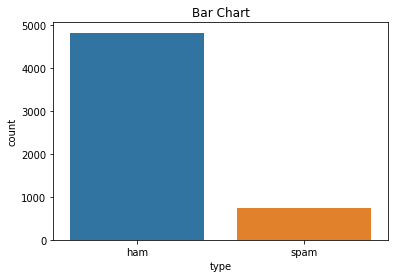

In [12]:
sns.countplot(x="type",data=data)
plt.title("Bar Chart")

Text(0.5,1,'Pie Chart')

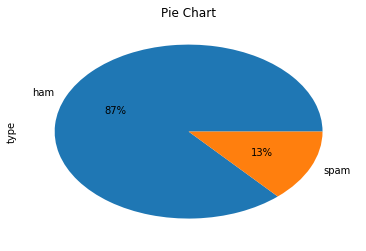

In [19]:
count_types=pd.value_counts(data["type"])
count_types.plot(kind='pie',autopct='%1.0f%%')
plt.title("Pie Chart")

In [22]:
data["type"]=data.type.map({'ham':0,'spam':1})

In [23]:
data.head()

,type,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
X=data["message"].values
y=data["type"].values

In [30]:
#converting message into lower case
for i in range(len(X)):
    X[i]=X[i].lower()

In [34]:
for i in range(len(X)):
    X[i]=re.sub(r'\W',' ',X[i])
    X[i]=re.sub(r'\d',' ',X[i])
    X[i]=re.sub(r'\s+',' ',X[i])

In [35]:
print(X[:5])

['gountiljurongpointcrazyavailableonlyinbugisngreatworldlaebuffetcinetheregotamorewat'
 'oklarjokingwifuoni'
 'freeentryinawklycomptowinfacupfinaltktsstmaytextfatotoreceiveentryquestionstdtxtratetcsapplyovers'
 'udunsaysoearlyhorucalreadythensay'
 'nahidontthinkhegoestousfhelivesaroundherethough']


In [37]:
from nltk.corpus import stopwords


In [42]:
for i in range(len(X)):
    words = nltk.word_tokenize(X[i])
    new_words = [word for word in words if word not in stopwords.words('english')]
    X[i] = ' '.join(new_words)

In [43]:
print(X[:5])

['gountiljurongpointcrazyavailableonlyinbugisngreatworldlaebuffetcinetheregotamorewat'
 'oklarjokingwifuoni'
 'freeentryinawklycomptowinfacupfinaltktsstmaytextfatotoreceiveentryquestionstdtxtratetcsapplyovers'
 'udunsaysoearlyhorucalreadythensay'
 'nahidontthinkhegoestousfhelivesaroundherethough']


In [44]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

for i in range(len(X)):
    words = nltk.word_tokenize(X[i])
    new_words = [stemmer.stem(word) for word in words]
    X[i] = ' '.join(new_words)

# first 5 messages after stemming
print(X[:5])


['gountiljurongpointcrazyavailableonlyinbugisngreatworldlaebuffetcinetheregotamorewat'
 'oklarjokingwifuoni'
 'freeentryinawklycomptowinfacupfinaltktsstmaytextfatotoreceiveentryquestionstdtxtratetcsapplyov'
 'udunsaysoearlyhorucalreadythensay'
 'nahidontthinkhegoestousfhelivesaroundherethough']


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer('english')
X=vectorizer.fit_transform(X)

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [61]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB(alpha=0.2)

In [62]:
clf.fit(X_train,y_train)

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

In [63]:
pred=clf.predict(X_test)

In [64]:
accuracy=accuracy_score(y_test,pred)

In [65]:
print("the accuracy of naive bayes is: ",accuracy)

the accuracy of naive bayes is:  0.9090909090909091


In [68]:
from sklearn.svm import SVC
clf=SVC(kernel='linear')
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)

print("the accuracy of the svm is : ",accuracy)

the accuracy of the svm is :  0.9090909090909091


In [72]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy for Decision Tree Classifier: ', accuracy)

Accuracy for Decision Tree Classifier:  0.9090909090909091
